In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
df = pd.read_csv('../data_samples/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [8]:
cdf = df.groupby('day').sum()
cdf.drop(['size'] , inplace=True , axis=1)
cdf['percent'] = cdf['tip'] / cdf['total_bill'] * 100
cdf[['percent' , 'tip','total_bill']]

,percent,tip,total_bill
day,,,
Fri,15.944519,51.96,325.88
Sat,14.642375,260.40,1778.40
Sun,15.203791,247.39,1627.16
Thur,15.673201,171.83,1096.33


In [9]:
_cdf = df.groupby(['day', 'size']).sum()
_cdf['percent'] = _cdf ['tip'] / _cdf['total_bill'] * 100
_cdf.dropna()
_cdf[['percent' , 'tip','total_bill']]

percent     tip  total_bill
day  size                               
Fri  1     22.377622    1.92        8.58
     2     16.201417   42.31      261.15
     3     18.773467    3.00       15.98
     4     11.774956    4.73       40.17
Sat  1     19.379845    2.00       10.32
     2     14.952318  133.43      892.37
     3     14.887732   68.36      459.17
     4     13.803136   53.61      388.39
     5     10.657194    3.00       28.15
Sun  2     16.041703  109.86      684.84
     3     14.067196   46.81      332.76
     4     15.316722   73.58      480.39
     5     14.987654   12.14       81.00
     6     10.379905    5.00       48.17
Thur 1     18.172790    1.83       10.07
     2     16.114799  117.24      727.53
     3     14.052714   10.77       76.64
     4     14.083472   21.09      149.75
     5     12.138869    5.00       41.19
     6     17.443774   15.90       91.15

In [36]:
df = pd.read_csv('../data_samples/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df.replace({'sex' : {'Male' : 1 ,'Female' : 0 } ,'smoker':{'No' : 0 , 'Yes' : 1}} , inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [38]:
days = pd.get_dummies(df['day'], dtype=int)
days.sample(5)


,Fri,Sat,Sun,Thur
48,0,0,1,0
147,0,0,0,1
195,0,0,0,1
33,0,1,0,0
29,0,1,0,0


In [39]:
days = pd.get_dummies(df['day'], dtype=int)
df = pd.concat([df, days], axis=1)
df.sample(6)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur
107,25.21,4.29,1,1,Sat,Dinner,2,0,1,0,0
37,16.93,3.07,0,0,Sat,Dinner,3,0,1,0,0
104,20.92,4.08,0,0,Sat,Dinner,2,0,1,0,0
116,29.93,5.07,1,0,Sun,Dinner,4,0,0,1,0
80,19.44,3.00,1,1,Thur,Lunch,2,0,0,0,1
26,13.37,2.00,1,0,Sat,Dinner,2,0,1,0,0


In [40]:
times = pd.get_dummies(df['time'], dtype=int)
df = pd.concat([df, times], axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,0,0,Sun,Dinner,2,0,0,1,0,1,0
1,10.34,1.66,1,0,Sun,Dinner,3,0,0,1,0,1,0
2,21.01,3.50,1,0,Sun,Dinner,3,0,0,1,0,1,0
3,23.68,3.31,1,0,Sun,Dinner,2,0,0,1,0,1,0
4,24.59,3.61,0,0,Sun,Dinner,4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,Dinner,3,0,1,0,0,1,0
240,27.18,2.00,0,1,Sat,Dinner,2,0,1,0,0,1,0
241,22.67,2.00,1,1,Sat,Dinner,2,0,1,0,0,1,0
242,17.82,1.75,1,0,Sat,Dinner,2,0,1,0,0,1,0


In [41]:
X = df[['sex','smoker','size','Fri','Sat','Sun','Thur','Dinner']]
y = df['tip']

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<Axes: xlabel='tip', ylabel='Count'>

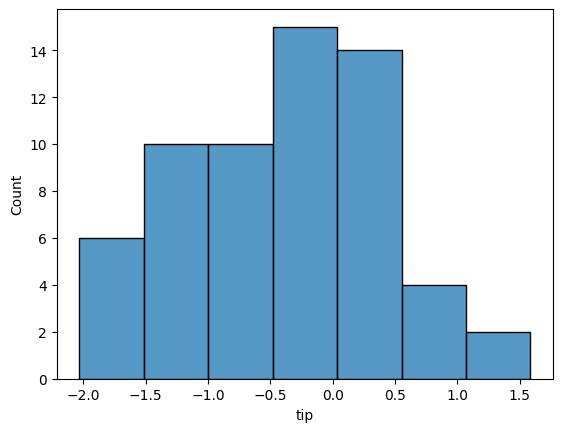

In [51]:
pred = model.predict(X_test)
sns.histplot(y_test-pred)

In [52]:
print(f'MAE : {metrics.mean_absolute_error(y_test , pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , pred))}')


MAE : 0.69186018000511
MSE : 0.779043155480163
RMSE : 0.8826342138622109


In [53]:
X.head()

,sex,smoker,size,Fri,Sat,Sun,Thur,Dinner
0,0,0,2,0,0,1,0,1
1,1,0,3,0,0,1,0,1
2,1,0,3,0,0,1,0,1
3,1,0,2,0,0,1,0,1
4,0,0,4,0,0,1,0,1


In [59]:
new_customer = np.array([1 , 1 , 3 ,0,0,0,1,0]).reshape(1, -1)
new_customer

array([[1, 1, 3, 0, 0, 0, 1, 0]])

In [60]:
model.predict(new_customer)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.3405578])